<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

# **Objetivo**
El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente mujer tiene o no diabetes.

- Pregnancies  : número de veces de embarazada
- Glucose      :concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa
- BloodPressure: presión arterial diastólica (mm Hg)
- SkinThickness: grosor del pliegue cutáneo del tríceps (mm)
- Insulin      : insulina sérica de 2 horas (mu U/ml)
- BMI          : Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: función de pedigrí de diabetes
- Age: edad
- Outcome: churm


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Split**
---

In [4]:
X = data_values[:, :8]
y = data_values[:, 8]

# **Holdount**
---



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, shuffle=True)

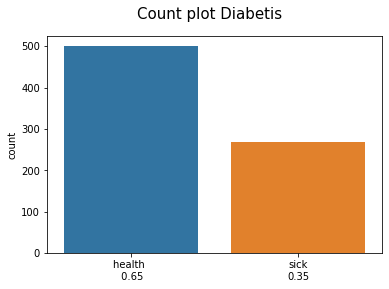

In [6]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle('Count plot Diabetis', fontsize = 15)
sns.countplot(x = y, ax = ax)
_, data_target = np.unique(data_values[:, 8], return_counts=True)
len_data = data_values.shape[0]
pe = '{0:.2f}'.format(data_target[1]/len_data)
ps = '{0:.2f}'.format(data_target[0]/len_data)
ax.set_xticklabels([f'health \n {ps}', f'sick\n{pe}'])
fig.show()

- Hay un desbalance en el conjunto de datos del 65% para los pacientes sanos y 35% para los pacientes enfermos.

# **Model**
---

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(4, activation = 'relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=300, batch_size=16, verbose=0)

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [9]:
# Problema de optimización
loss, accuracy, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy)
print('Loss: %.3f' % loss)

20/20 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.7101 - recall: 0.3099
Recall: 0.310
Accuracy: 0.710
Loss: 0.590


In [10]:
# Problema de inferencia
val_loss, val_accuracy, val_recall = model.evaluate(X_test, y_test)
print('Val Recall: %.3f' % val_recall)
print('Val Accuracy: %.3f' % val_accuracy)
print('val Loss: %.3f'% val_loss)

5/5 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.7013 - recall: 0.2727
Val Recall: 0.273
Val Accuracy: 0.701
val Loss: 0.690


In [11]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


# **Val loss and Loss**
---

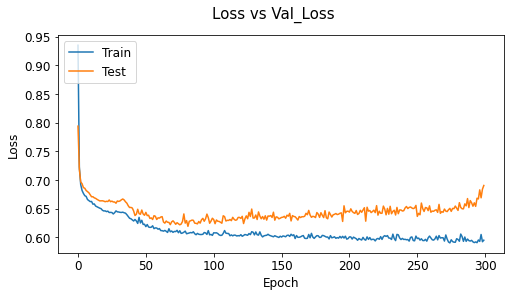

In [12]:
fig, ax = plt.subplots(figsize = (8, 4))
fig.suptitle('Loss vs Val_Loss', fontsize = 15)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Loss', size = 12)
ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
ax.tick_params(labelsize = 12)

- La perdida de entrenamiento y validación converge hasta cierto punto.

# **Predictions**
---


In [13]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
      dtype=int32)

In [14]:
for i in range(15):
  print('%s --> %d (real %d)'% (X_test[i].tolist(), y_pred[i], y_test[i]))

[0.0, 113.0, 80.0, 16.0, 0.0, 31.0, 0.874, 21.0] --> 0 (real 0)
[3.0, 180.0, 64.0, 25.0, 70.0, 34.0, 0.271, 26.0] --> 0 (real 0)
[7.0, 114.0, 64.0, 0.0, 0.0, 27.4, 0.732, 34.0] --> 0 (real 1)
[1.0, 125.0, 50.0, 40.0, 167.0, 33.3, 0.962, 28.0] --> 1 (real 1)
[2.0, 120.0, 76.0, 37.0, 105.0, 39.7, 0.215, 29.0] --> 0 (real 0)
[2.0, 128.0, 64.0, 42.0, 0.0, 40.0, 1.101, 24.0] --> 0 (real 0)
[4.0, 137.0, 84.0, 0.0, 0.0, 31.2, 0.252, 30.0] --> 0 (real 0)
[3.0, 103.0, 72.0, 30.0, 152.0, 27.6, 0.73, 27.0] --> 0 (real 0)
[6.0, 190.0, 92.0, 0.0, 0.0, 35.5, 0.278, 66.0] --> 0 (real 1)
[1.0, 109.0, 56.0, 21.0, 135.0, 25.2, 0.833, 23.0] --> 0 (real 0)
[1.0, 181.0, 78.0, 42.0, 293.0, 40.0, 1.258, 22.0] --> 1 (real 1)
[0.0, 120.0, 74.0, 18.0, 63.0, 30.5, 0.285, 26.0] --> 0 (real 0)
[7.0, 136.0, 90.0, 0.0, 0.0, 29.9, 0.21, 50.0] --> 0 (real 0)
[1.0, 71.0, 62.0, 0.0, 0.0, 21.8, 0.416, 26.0] --> 0 (real 0)
[3.0, 111.0, 90.0, 12.0, 78.0, 28.4, 0.495, 29.0] --> 0 (real 0)


# **Sesgo predictivo**
---





In [15]:
#sesgo predicción = promedio de predicciones - promedio de etiquetas (observaciones) en el conjunto de datos
# Sick
average_prediction = (len(y_pred[y_pred==1])/len(y_pred))
average_label_target = (len(y_test[y_test==1]) / len(y_test)) 
sesgo_prediction = average_prediction - average_label_target
sesgo_prediction

-0.2207792207792208

In [16]:
print(f'Promedio de predicciones:  {average_prediction}')
print(f'Promedio de etiquetas: {average_label_target}')
print(f'Sesgo de predicción: {sesgo_prediction}')

Promedio de predicciones:  0.13636363636363635
Promedio de etiquetas: 0.35714285714285715
Sesgo de predicción: -0.2207792207792208


- El modelo presenta un sesgo negativo (subestima)
- En promedio hay un 36% de personas con diabetes, pero mi modelo está prediciendo un 20%

# **Confusion Matrix**
---



In [17]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[93,  6],
       [40, 15]])

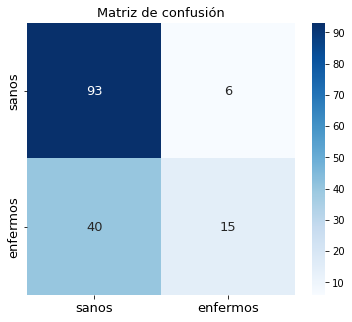

In [18]:
fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (6,5))
sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
ax.set_title('Matriz de confusión', size = 13)
ax.xaxis.set_ticklabels(['sanos', 'enfermos'])
ax.yaxis.set_ticklabels(['sanos', 'enfermos'])
ax.tick_params(labelsize = 13)

- El modelo para la detección de enfermos es muy regular, ya que tiene un porcentaje conciderable de falsos negativos, ya que se está detectando enfermos como sanos.

# Metrics

In [19]:
print(f'Accuracy  :   {metrics.accuracy_score(y_test, y_pred)}')
print(f'Kappa     :   {metrics.cohen_kappa_score(y_test, y_pred)}')

print(f'predicción enfermos')
print(f'Precision:   {metrics.precision_score(y_test, y_pred, labels=[1], average="macro")}')
print(f'Recall    :   {metrics.recall_score(y_test, y_pred, labels=[1], average="macro")}')

VN = matrix[0,0]
FP = matrix[0,1]
specificity = VN/(VN+FP)

print(f'Specificity:   {specificity}')
print(f'F1-score   :   {metrics.f1_score(y_test, y_pred, labels=[1], average="macro")}' )

Accuracy  :   0.7012987012987013
Kappa     :   0.24590163934426235
predicción enfermos
Precision:   0.7142857142857143
Recall    :   0.2727272727272727
Specificity:   0.9393939393939394
F1-score   :   0.3947368421052631


- El modelo es deficiente al momento de predecir los enfermos, contiene un recall del 40%
- Los estimadores de predicción y realidad están deacuerdo con un 40%, por lo tanto en la predicción hay un 60% aleatorio

# Cross Validation

In [20]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []


for train, test in kfold.split(X, y):
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
  history = model.fit(X[train], y[train], validation_data=(X[test], y[test]), verbose = 0)
  loss_train, _, recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, _, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, recall_test*100))

loss: 5.763 recall: 31.535% val_loss: 6.577 val_recall: 37.037%
loss: 2.842 recall: 67.635% val_loss: 2.941 val_recall: 55.556%
loss: 5.892 recall: 54.772% val_loss: 5.554 val_recall: 51.852%
loss: 16.229 recall: 100.000% val_loss: 17.980 val_recall: 100.000%
loss: 2.927 recall: 43.983% val_loss: 2.027 val_recall: 59.259%
loss: 9.251 recall: 0.000% val_loss: 4.864 val_recall: 0.000%
loss: 2.820 recall: 29.461% val_loss: 3.189 val_recall: 11.111%
loss: 7.842 recall: 0.000% val_loss: 8.451 val_recall: 0.000%
loss: 22.482 recall: 99.587% val_loss: 26.372 val_recall: 100.000%
loss: 12.475 recall: 0.000% val_loss: 13.743 val_recall: 0.000%


- Los valores en 10 lotes, parecen no converjer, por lo tanto mi modelo puede que realice predicciones con efecto de aleatoriedad

In [21]:
print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train)*100, np.std(cvscores_recall_train)*100))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test)*100, np.std(cvscores_recall_test)*100))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

==============================Train Recall Total 10 pliegues==============================
42.70% (+/- 36.14%)
==============================Test Recall Total 10 pliegues==============================
41.48% (+/- 36.84%)
==============================Train Loss Total 10 pliegues==============================
8.85% (+/- 6.17%)
==============================Test Loss Total 10 pliegues==============================
9.17% (+/- 7.48%)


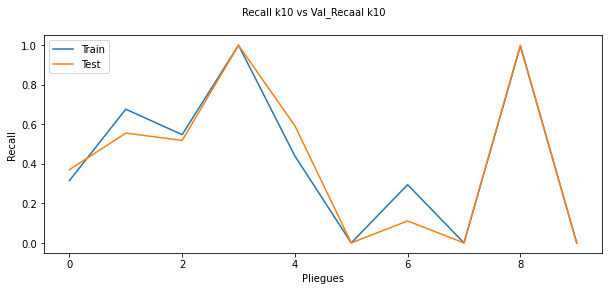

In [22]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

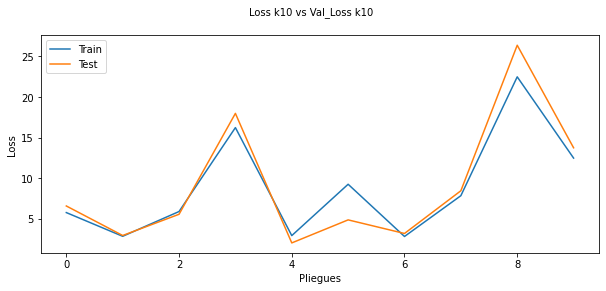

In [23]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

- El modelo presente fallas a la hora de predecir enfermos.
  - Se puede buscar más datos, agregar mas neuronas o utilizar una estrategia con el gradiente.